In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [4]:
#Caraga de datos, cracion de df y visualización 
Data='Alternative Fuel Vehicles US.csv'
df=pd.read_csv(Data)
df.head()

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
0,Sedan/Wagon,NSX,2022.0,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,21.0,Auto,NaN,SI,3.5L,6.0,NaN,NaN,NaN,AWD
1,Sedan/Wagon,A3,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,32.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,FWD
2,Sedan/Wagon,A3 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,31.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
3,Sedan/Wagon,A4 allroad quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,26.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
4,Sedan/Wagon,A4 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,29.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Category                            882 non-null    object 
 1   Model                               882 non-null    object 
 2   Model Year                          594 non-null    float64
 3   Manufacturer                        882 non-null    object 
 4   Fuel                                882 non-null    object 
 5   All-Electric Range                  222 non-null    float64
 6   PHEV Total Range                    43 non-null     float64
 7   Alternative Fuel Economy City       169 non-null    float64
 8   Alternative Fuel Economy Highway    169 non-null    float64
 9   Alternative Fuel Economy Combined   262 non-null    float64
 10  Conventional Fuel Economy City      444 non-null    float64
 11  Conventional Fuel Economy Highway   444 non-n

In [6]:
#Chequeo de Nulos 
df.isnull().sum()

Category                                0
Model                                   0
Model Year                            288
Manufacturer                            0
Fuel                                    0
All-Electric Range                    660
PHEV Total Range                      839
Alternative Fuel Economy City         713
Alternative Fuel Economy Highway      713
Alternative Fuel Economy Combined     620
Conventional Fuel Economy City        438
Conventional Fuel Economy Highway     438
Conventional Fuel Economy Combined    438
Transmission Type                     242
Transmission Make                     757
Engine Type                           293
Engine Size                           293
Engine Cylinder Count                 433
Number of Passengers                  761
Heavy-Duty Power System               637
Notes                                 703
Drivetrain                            553
dtype: int64

In [7]:
#Cheque de valores duplicados
if df.duplicated().sum()!=0:
     print(f'el df tiene registros duplivados')
else:
     print('El df no tiene registros duplicados')

el df tiene registros duplivados


In [8]:
df=df.drop_duplicates()

In [9]:
#Métricas de estadística descriptiva de las columnas a las que se les pueda medir metricas descriptivas
df.describe()

,Model Year,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Engine Cylinder Count
count,593.000000,222.000000,43.000000,169.000000,169.000000,262.000000,443.000000,443.000000,443.000000,448.000000
mean,2021.539629,165.927928,450.465116,84.585799,77.591716,75.992366,25.907449,30.085779,27.264108,5.450893
std,0.498848,132.992955,93.042578,39.430696,32.735123,32.303279,10.872066,12.830142,9.814812,1.397441
min,2021.000000,8.000000,290.000000,10.000000,12.000000,11.000000,13.000000,16.000000,15.000000,3.000000
25%,2021.000000,23.000000,380.000000,71.000000,66.000000,56.000000,19.000000,24.000000,21.000000,4.000000
50%,2022.000000,203.000000,460.000000,94.000000,85.000000,76.000000,22.000000,28.000000,24.000000,6.000000
75%,2022.000000,260.000000,520.000000,115.000000,99.000000,101.000000,28.000000,33.000000,30.000000,6.000000
max,2022.000000,520.000000,640.000000,150.000000,133.000000,142.000000,59.000000,231.000000,59.000000,8.000000


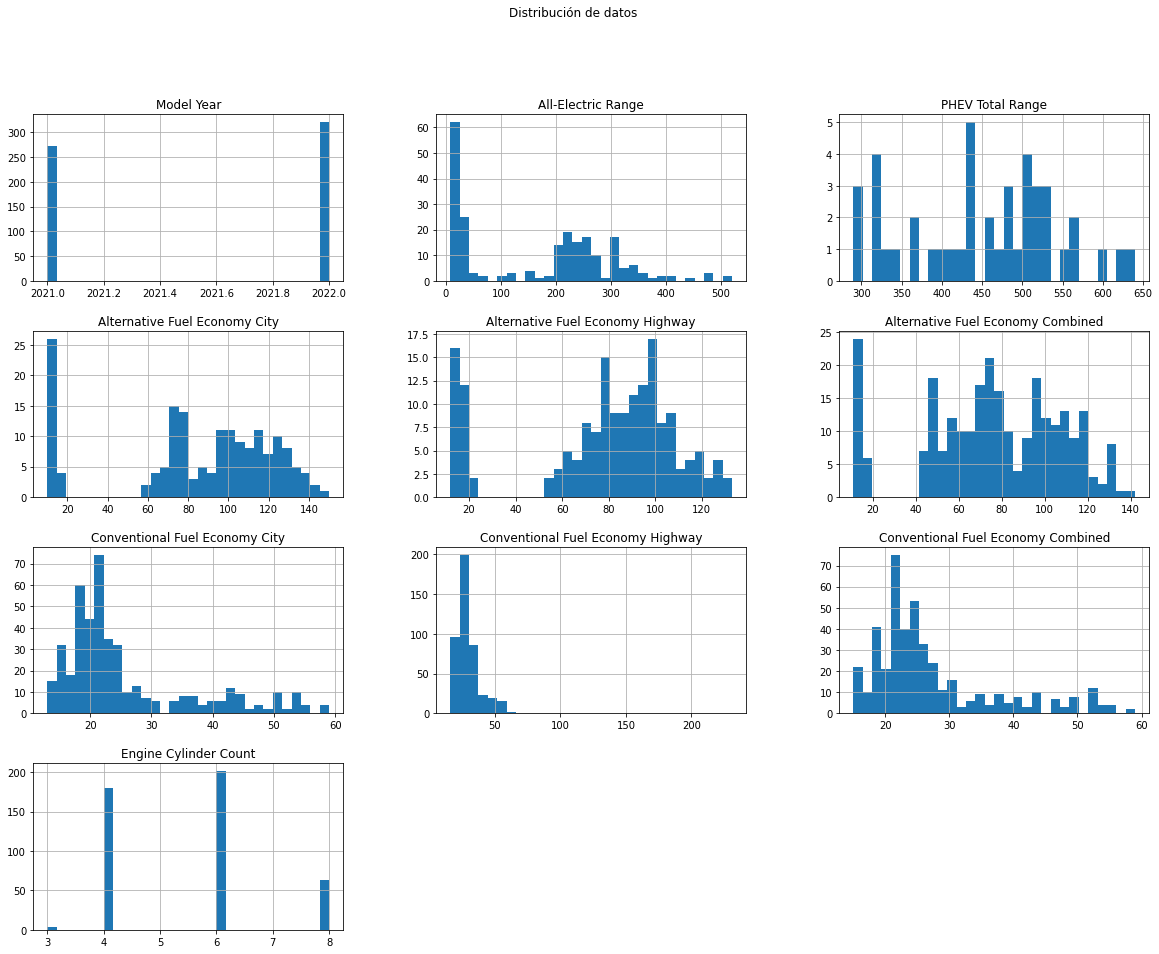

In [10]:
# Distribución 
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribución de datos')
plt.show()


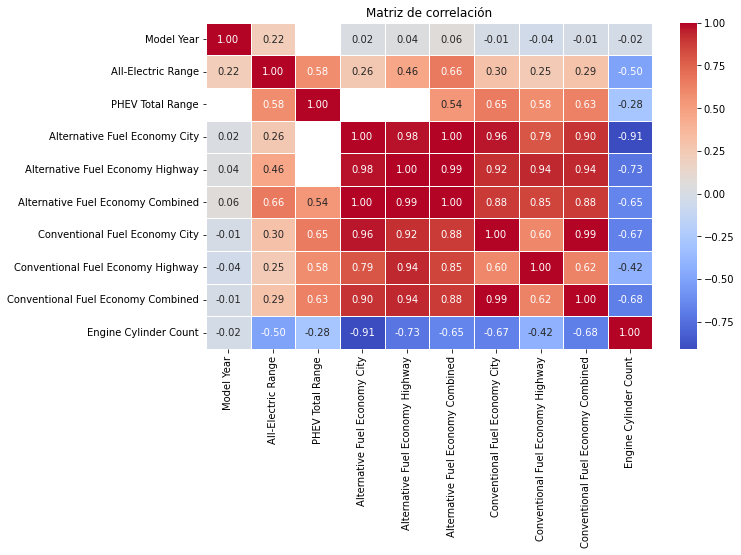

In [11]:
#Correlacion 
figsize=(10, 6)
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=figsize)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()